In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 1. Simple EDA and Baseline Model

In [6]:
# Load the cleaned complete data
all_df = pd.read_pickle('../dump/complete_data_cleaned')

In [7]:
all_df.head()

,index,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,...,author_popularity,log_book_search,log_author_search,book_popularity_test,log_book_popularity,author_popularity_test,log_author_popularity,log_owu,T_movie_age,T_book_age
0,1,The Godfather,9.2,R,"{Crime, Drama}",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,...,0.0567,5.257495,5.552960,0.263736,-1.332806,0.056703,-2.869923,-1.089289,1.957914,0.739863
1,2,Harry Potter and the Sorcerer's Stone,7.6,PG,"{Fantasy, Family, Adventure}",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,...,0.0121,8.651724,11.136048,0.182748,-1.699649,0.012077,-4.416414,2.160506,0.249813,-0.238792
3,4,Little Women,7.8,PG,"{Romance, Drama}",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,...,0.0098,12.273731,14.538217,0.005707,-5.166120,0.009810,-4.624402,0.826507,-2.150954,2.176436
7,8,Little Women,7.3,PG,"{Romance, Family, Drama}",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,...,0.0135,6.777647,7.326466,0.098874,-2.313910,0.013451,-4.308677,-0.274347,0.755924,2.176436
11,20,Ready Player One,7.5,PG-13,"{Action, Other, Adventure}",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,...,0.0010,11.231888,12.144197,0.001085,-6.826387,0.000974,-6.934004,1.498315,-1.869923,-1.298394


In [8]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 0 to 829
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   581 non-null    int64         
 1   movie_title             581 non-null    object        
 2   rating                  581 non-null    float64       
 3   MPAA                    581 non-null    object        
 4   genre                   581 non-null    object        
 5   release_date            581 non-null    datetime64[ns]
 6   budget                  581 non-null    float64       
 7   opening_weekend_usa     581 non-null    float64       
 8   gross_usa               581 non-null    float64       
 9   gross_world             581 non-null    float64       
 10  runtime                 581 non-null    float64       
 11  director                581 non-null    object        
 12  writer                  581 non-null    object    

In [19]:
# Choose only the continuous variables for now
continuous_variables = ['opening_weekend_usa','log_owu','rating',\
                        'budget','runtime','film_count_d','avg_rating_d','avg_gross_d','T_movie_age',\
                    'T_book_age','release_year','publish_year','page','log_book_popularity','log_author_popularity']
c_df = all_df[continuous_variables].copy()

In [20]:
c_df.describe()

,opening_weekend_usa,log_owu,rating,budget,runtime,film_count_d,avg_rating_d,avg_gross_d,T_movie_age,T_book_age,release_year,publish_year,page,log_book_popularity,log_author_popularity
count,5.810000e+02,5.810000e+02,581.000000,5.810000e+02,581.000000,581.000000,581.000000,5.810000e+02,5.810000e+02,5.810000e+02,581.000000,581.000000,581.000000,581.000000,581.000000
mean,1.135677e+07,3.514114e-16,6.655938,3.802508e+07,117.567986,7.347676,6.584607,3.590421e+07,2.675236e-17,2.231911e-16,2001.693632,1981.721170,346.518072,-3.941452,-5.007269
std,1.795332e+07,1.000862e+00,0.889859,3.661053e+07,24.151196,7.181366,0.554236,2.890664e+07,1.000862e+00,1.000862e+00,12.175404,37.034207,169.687070,1.856917,2.719733
min,2.243000e+03,-2.129245e+00,3.000000,8.290000e+05,74.000000,0.000000,4.960000,3.686000e+03,-2.538378e+00,-3.856191e+00,1940.000000,1726.000000,24.000000,-11.346477,-11.959746
25%,5.120350e+05,-9.110968e-01,6.100000,1.500000e+07,102.000000,2.000000,6.176000,2.088366e+07,-5.958726e-01,-5.925555e-01,1995.000000,1976.000000,244.000000,-5.186948,-7.217432
50%,5.655439e+06,1.617540e-01,6.700000,2.600000e+07,113.000000,5.000000,6.580000,3.092275e+07,8.590077e-02,-4.694498e-02,2003.000000,1993.000000,320.000000,-3.976562,-5.119305
75%,1.394537e+07,7.046038e-01,7.300000,5.000000e+07,128.000000,10.000000,6.960000,3.895457e+07,6.889270e-01,5.537229e-01,2010.000000,2003.000000,419.000000,-2.674825,-2.990551
max,1.525357e+08,2.667688e+00,9.200000,2.500000e+08,280.000000,43.000000,8.400000,2.096058e+08,3.216717e+00,3.092501e+00,2020.000000,2020.000000,1463.000000,0.883704,1.885514


In [21]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 0 to 829
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   opening_weekend_usa    581 non-null    float64
 1   log_owu                581 non-null    float64
 2   rating                 581 non-null    float64
 3   budget                 581 non-null    float64
 4   runtime                581 non-null    float64
 5   film_count_d           581 non-null    int64  
 6   avg_rating_d           581 non-null    float64
 7   avg_gross_d            581 non-null    int64  
 8   T_movie_age            581 non-null    float64
 9   T_book_age             581 non-null    float64
 10  release_year           581 non-null    int64  
 11  publish_year           581 non-null    float64
 12  page                   581 non-null    float64
 13  log_book_popularity    581 non-null    float64
 14  log_author_popularity  581 non-null    float64
dtypes: flo

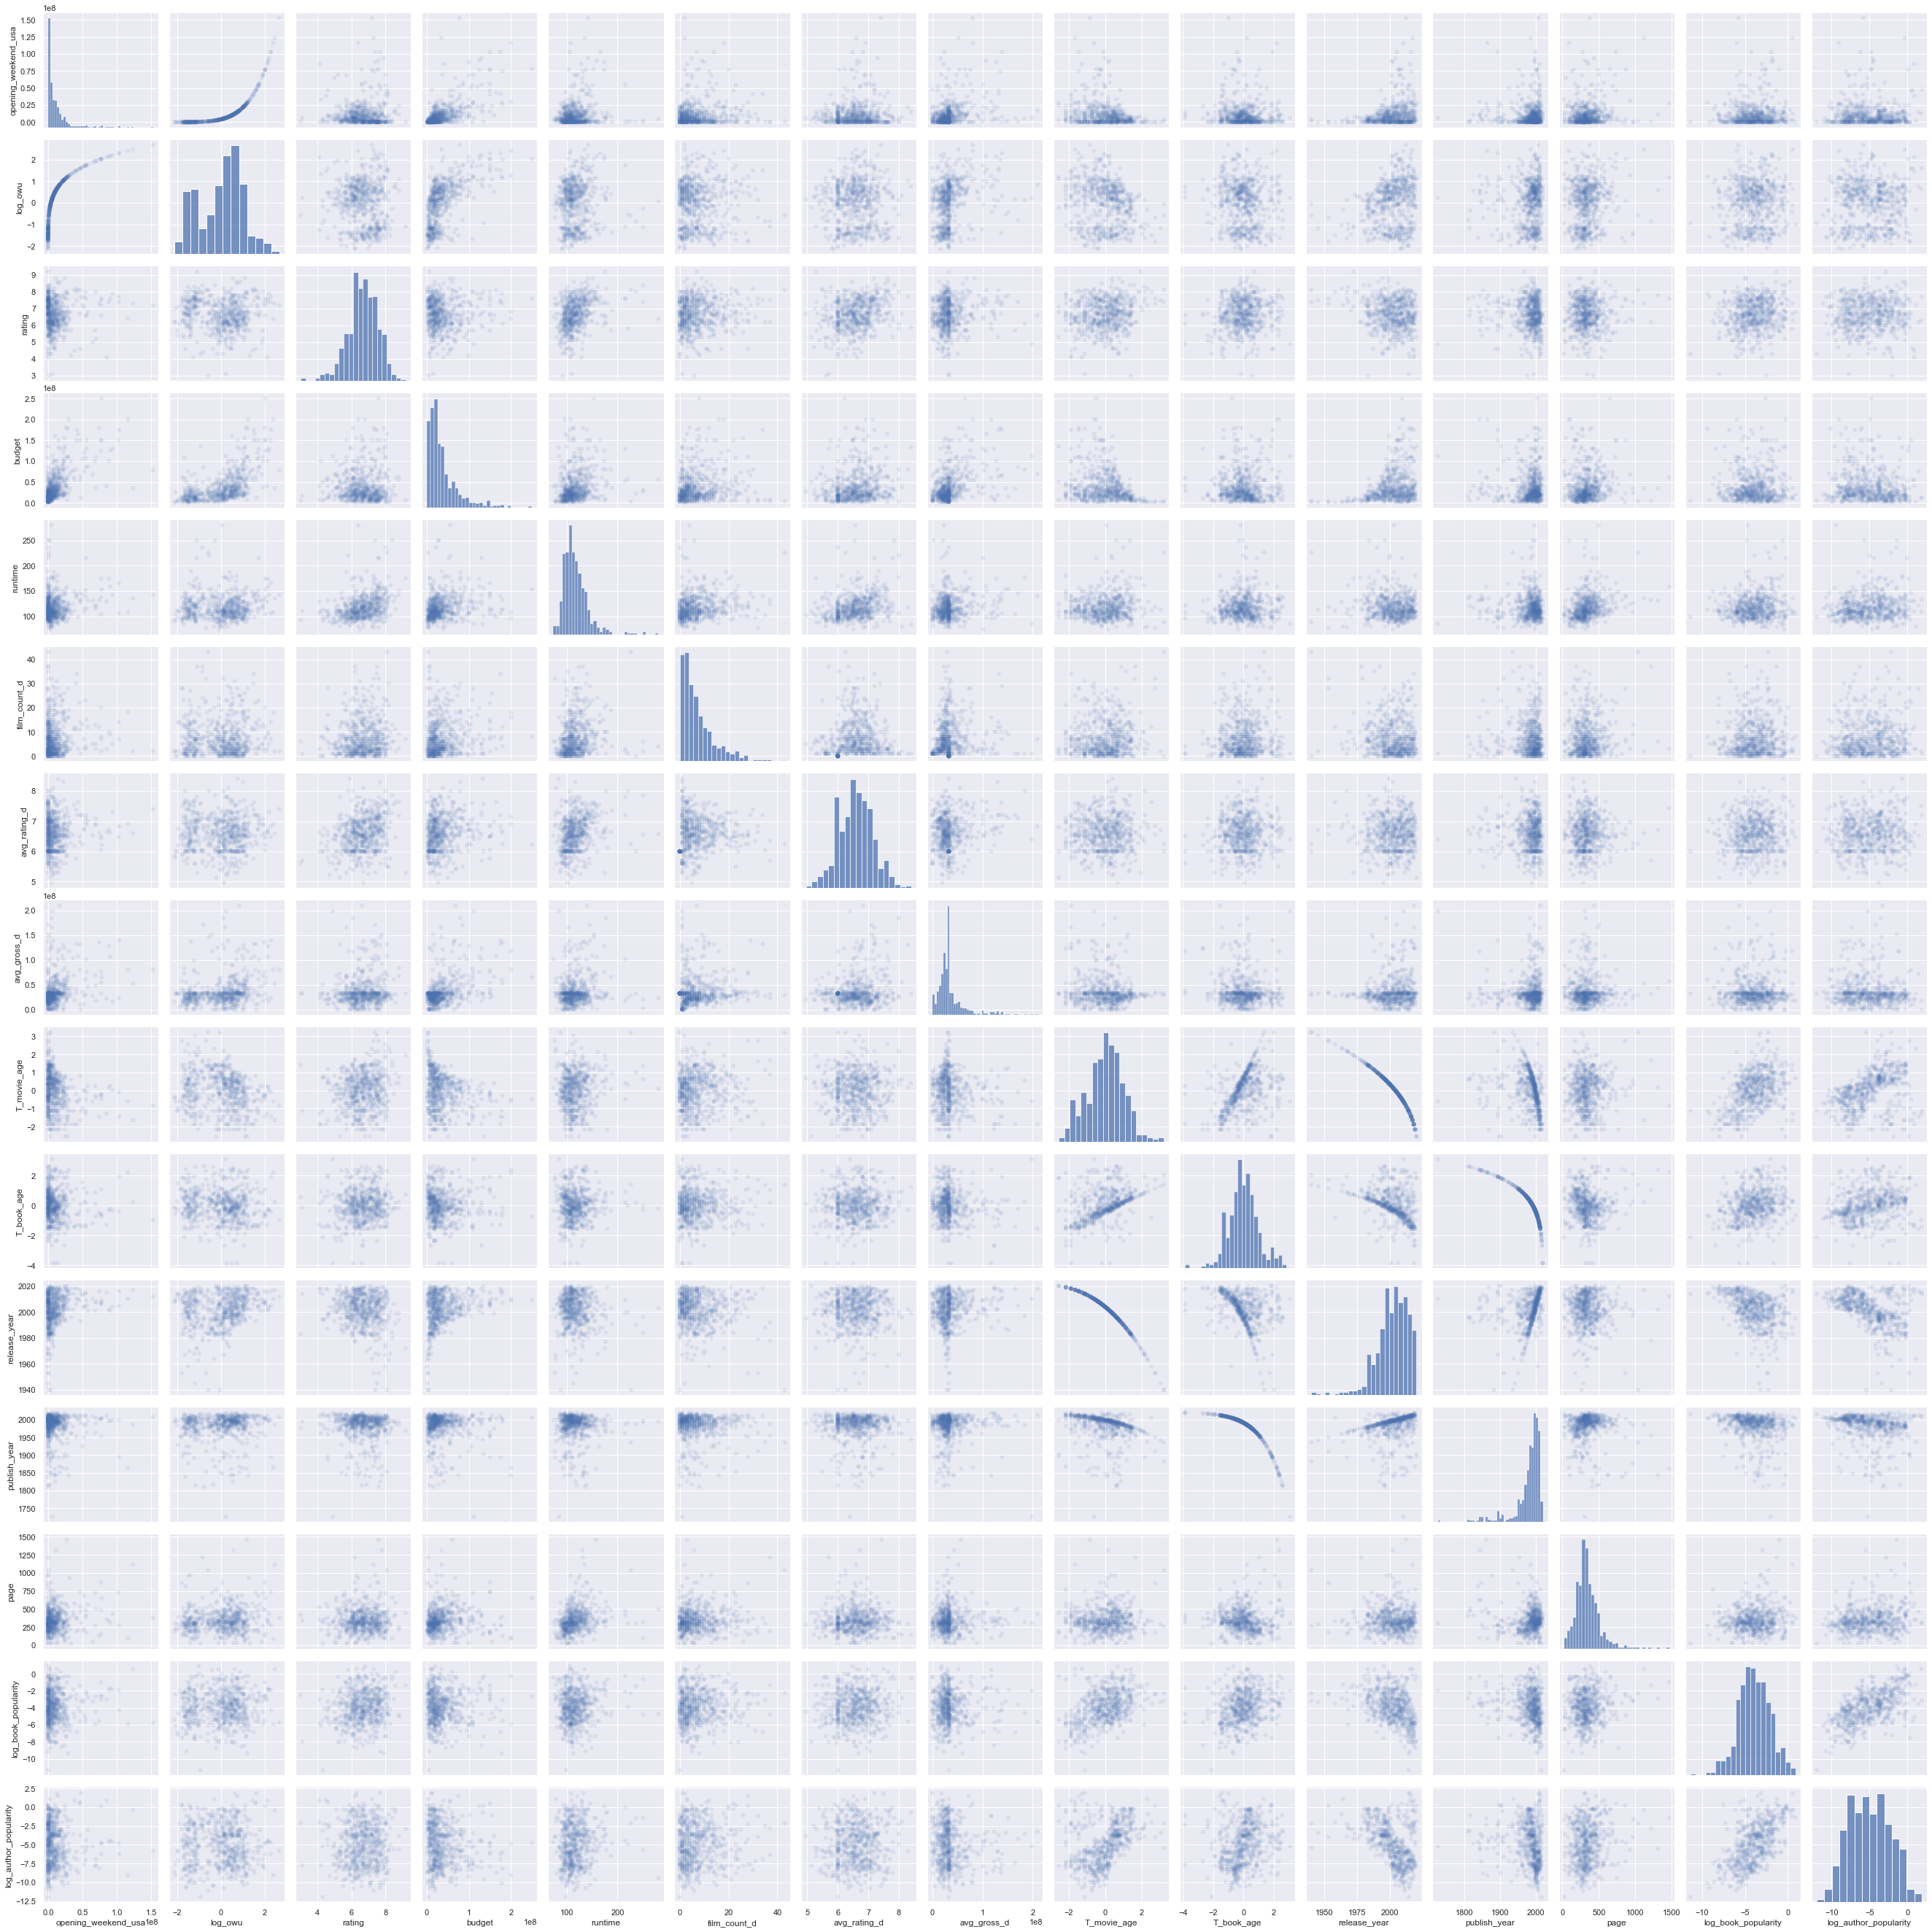

In [22]:
sns.pairplot(c_df, plot_kws=dict(alpha=.1, edgecolor='none'))

### Baseline Model
Only consider the continuous predictors and use 'opening_weekend_usa'.

In [23]:
# Separate features and target variable

y = c_df['opening_weekend_usa']

X = c_df[['budget','runtime','film_count_d','avg_rating_d','avg_gross_d','T_movie_age',\
                    'T_book_age','release_year','publish_year','page','log_book_popularity','log_author_popularity']]

In [34]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
        
    
    # Visualization
    fig, ax = plt.subplots(1, 1)
    plt.scatter(y_val, y_pred)

    ax.set_xlabel('Opening weekend gross (USD)')
    ax.set_ylabel('Prediction (USD)')

    ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8])
    ax.set_xticklabels(['0','20M','40M','60M','80M','100M','120M','140M','160M'])
    ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
    ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

    x=np.linspace(0,0.7e8,50)
    y=x
    plt.plot(x,y,color='red')


Validation R^2 score was: 0.5055441766369759
Feature coefficient results: 

budget : 0.29
runtime : 835.31
film_count_d : -87446.37
avg_rating_d : -531833.46
avg_gross_d : 0.00
T_movie_age : -5421408.46
T_book_age : 1348118.15
release_year : -237121.07
publish_year : 54628.37
page : 7973.85
log_book_popularity : 755473.21
log_author_popularity : 217705.41


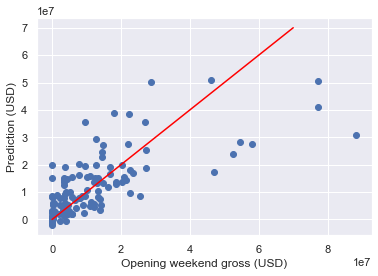

In [35]:
split_and_validate(X,y)

In [ ]:
# Visualization
fig, ax = plt.subplots(1, 1)
plt.scatter(y_test, y_pred)

ax.set_xlabel('Opening weekend gross (USD)')
ax.set_ylabel('Prediction (USD)')

ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8,1e8,1.2e8,1.4e8,1.6e8])
ax.set_xticklabels(['0','20M','40M','60M','80M','100M','120M','140M','160M'])
ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

x=np.linspace(0,0.7e8,50)
y=x
plt.plot(x,y,color='red')

In [26]:
X_val

NameError: name 'X_val' is not defined